<a href="https://colab.research.google.com/github/surayajohari/STQD6324-Data-Management/blob/main/suraya_assignment3_stqd6324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME**: SURAYA ADNIN BINTI JOHARI

**NO. MATRIKS**: P137383

**SUBJECT CODE**: STQD6324

**SUBJECT NAME**: DATA MANAGEMENT

**ASSIGNMENT 3**: Spark MLlib

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e904bd37d804f7e496f3e957948b40556648ff15af4b052460a39585caef89ae
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


# 1. Load the Iris dataset into a Spark DataFrame:

In [ ]:
from pyspark.sql import SparkSession

# Initializing Spark Session
spark = SparkSession.builder.appName("Iris Classification").getOrCreate()

# Load Iris dataset into Spark DataFrame
iris_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/content/drive/MyDrive/STQD6324/iris_data.csv")
iris_df.show()

+------------+-----------+------------+-----------+-------+
|Sepal.Length|Sepal.Width|Petal.Length|Petal.Width|Species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [ ]:
# Renaming column names to camelCase format
iris_df = iris_df.withColumnRenamed('Sepal.Length', 'sepalLength')\
                    .withColumnRenamed('Sepal.Width', 'sepalWidth')\
                    .withColumnRenamed('Petal.Length', 'petalLength')\
                    .withColumnRenamed('Petal.Width', 'petalWidth')
iris_df.show()

+-----------+----------+-----------+----------+-------+
|sepalLength|sepalWidth|petalLength|petalWidth|Species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
|        5.0|       3.6|        1.4|       0.2| setosa|
|        5.4|       3.9|        1.7|       0.4| setosa|
|        4.6|       3.4|        1.4|       0.3| setosa|
|        5.0|       3.4|        1.5|       0.2| setosa|
|        4.4|       2.9|        1.4|       0.2| setosa|
|        4.9|       3.1|        1.5|       0.1| setosa|
|        5.4|       3.7|        1.5|       0.2| setosa|
|        4.8|       3.4|        1.6|       0.2| setosa|
|        4.8|       3.0|        1.4|       0.1| setosa|
|        4.3|       3.0|        1.1|       0.1| setosa|
|        5.8|       4.0|        1.2|       0.2| 

In [ ]:
# Since Spieces is a a string, we're going to convert it into numeric
# to fit our data later

from pyspark.ml.feature import StringIndexer

# Convert label column to numeric using StringIndexer
label_col = 'Species'
indexer = StringIndexer(inputCol=label_col, outputCol="label")
iris_df = indexer.fit(iris_df).transform(iris_df)

In [ ]:
# To show the names of the available columns
print(iris_df.columns)

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'Species', 'label']


In [ ]:
# Since our feature column consists of multiple column, hence here we're
# combining our feature column into a single vector column

from pyspark.ml.feature import VectorAssembler

feature_cols = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']

# Combining feature column into a single vector column
vect_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Transform the dataset
iris_df = vect_assembler.transform(iris_df)

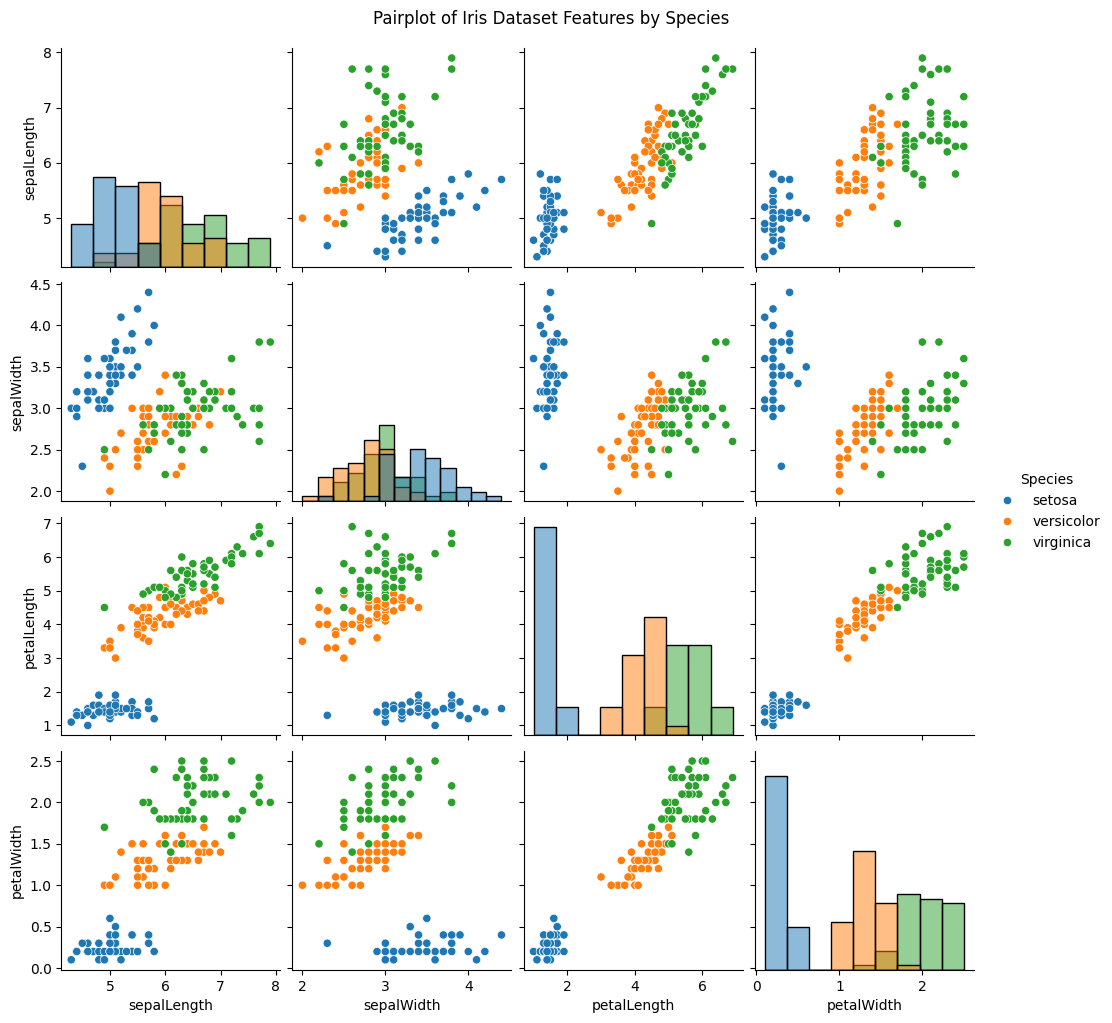

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of data
iris_pd = iris_df.select('sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'Species').toPandas()

sns.pairplot(iris_pd, hue="Species", diag_kind='hist')
plt.suptitle("Pairplot of Iris Dataset Features by Species", y=1.02)
plt.show()

# 2. Split the dataset into training and testing sets

In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = iris_df.randomSplit([0.7, 0.3])

In [ ]:
# To look at the training sets
train_df.show()

+-----------+----------+-----------+----------+----------+-----+-----------------+
|sepalLength|sepalWidth|petalLength|petalWidth|   Species|label|         features|
+-----------+----------+-----------+----------+----------+-----+-----------------+
|        4.3|       3.0|        1.1|       0.1|    setosa|  0.0|[4.3,3.0,1.1,0.1]|
|        4.4|       2.9|        1.4|       0.2|    setosa|  0.0|[4.4,2.9,1.4,0.2]|
|        4.4|       3.0|        1.3|       0.2|    setosa|  0.0|[4.4,3.0,1.3,0.2]|
|        4.6|       3.2|        1.4|       0.2|    setosa|  0.0|[4.6,3.2,1.4,0.2]|
|        4.6|       3.4|        1.4|       0.3|    setosa|  0.0|[4.6,3.4,1.4,0.3]|
|        4.6|       3.6|        1.0|       0.2|    setosa|  0.0|[4.6,3.6,1.0,0.2]|
|        4.7|       3.2|        1.3|       0.2|    setosa|  0.0|[4.7,3.2,1.3,0.2]|
|        4.7|       3.2|        1.6|       0.2|    setosa|  0.0|[4.7,3.2,1.6,0.2]|
|        4.8|       3.0|        1.4|       0.1|    setosa|  0.0|[4.8,3.0,1.4,0.1]|
|   

In [ ]:
# To look at the testing sets
test_df.show()

+-----------+----------+-----------+----------+----------+-----+-----------------+
|sepalLength|sepalWidth|petalLength|petalWidth|   Species|label|         features|
+-----------+----------+-----------+----------+----------+-----+-----------------+
|        4.4|       3.2|        1.3|       0.2|    setosa|  0.0|[4.4,3.2,1.3,0.2]|
|        4.5|       2.3|        1.3|       0.3|    setosa|  0.0|[4.5,2.3,1.3,0.3]|
|        4.6|       3.1|        1.5|       0.2|    setosa|  0.0|[4.6,3.1,1.5,0.2]|
|        4.9|       3.0|        1.4|       0.2|    setosa|  0.0|[4.9,3.0,1.4,0.2]|
|        4.9|       3.1|        1.5|       0.1|    setosa|  0.0|[4.9,3.1,1.5,0.1]|
|        5.0|       2.0|        3.5|       1.0|versicolor|  1.0|[5.0,2.0,3.5,1.0]|
|        5.0|       2.3|        3.3|       1.0|versicolor|  1.0|[5.0,2.3,3.3,1.0]|
|        5.0|       3.0|        1.6|       0.2|    setosa|  0.0|[5.0,3.0,1.6,0.2]|
|        5.0|       3.3|        1.4|       0.2|    setosa|  0.0|[5.0,3.3,1.4,0.2]|
|   

# 3. Select a classification algroithm (e.g., Decision Trees, Random Forst, Logistic Regression) from Spark MLib

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Build a Logistic Regression model
lr = LogisticRegression(labelCol="label", featuresCol="features")

# Fit the model
lr_model = lr.fit(train_df)

# 4. Employ techniques such as cross-validation and grid search to fine-tune the hyperparameters of the chosen algorithm.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
# Define a grid of hyperparameters to test
paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01]).addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]).build()

# Set up a CrossValidator with the Logistic Regression model and parameter grid
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy"),
                          numFolds=5)

# Fit CrossValidator to the training data
cv_model = crossval.fit(train_df)

# Make predictions on test data
predictions = cv_model.transform(test_df)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy after cross-validation and grid search: {accuracy}")

Accuracy after cross-validation and grid search: 0.975


# 5. Evaluate the performance of the tuned model using relevant evaluation metrics (e.g., accuracy, precision, recall, F1-score).

In [ ]:
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Compute evaluation metrics
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")

Accuracy: 0.975
Precision: 0.9765625
Recall: 0.975
F1-score: 0.9748079877112136


# 6. Use the tuned model to generate predictions on the testing data.

In [ ]:
# Make predictions on test data
predictions = cv_model.transform(test_df)

# Show predictions (optional)
predictions.select("features", "label", "prediction").show(10)

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.4,3.2,1.3,0.2]|  0.0|       0.0|
|[4.5,2.3,1.3,0.3]|  0.0|       0.0|
|[4.6,3.1,1.5,0.2]|  0.0|       0.0|
|[4.9,3.0,1.4,0.2]|  0.0|       0.0|
|[4.9,3.1,1.5,0.1]|  0.0|       0.0|
|[5.0,2.0,3.5,1.0]|  1.0|       1.0|
|[5.0,2.3,3.3,1.0]|  1.0|       1.0|
|[5.0,3.0,1.6,0.2]|  0.0|       0.0|
|[5.0,3.3,1.4,0.2]|  0.0|       0.0|
|[5.0,3.4,1.6,0.4]|  0.0|       0.0|
+-----------------+-----+----------+
only showing top 10 rows



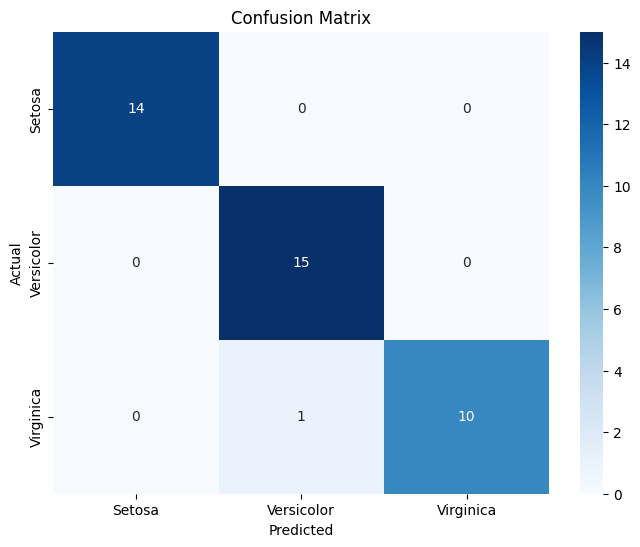

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions DataFrame to Pandas DataFrame for sklearn
y_true = predictions.select("label").toPandas()['label']
y_pred = predictions.select("prediction").toPandas()['prediction']

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class labels from StringIndexer (if available)
# If not available, you can define them manually based on your dataset
class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Conduct a comparative analysis between the predicted labels and the actual labels to assess the model's performance.

In [ ]:
# Conduct comparative analysis
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Compute evaluation metrics
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")

Accuracy: 0.975
Precision: 0.9765625
Recall: 0.975
F1-score: 0.9748079877112136


**Interpretation of Evaluation Metrics:**

1. **Accuracy (0.975):**

Accuracy measures the proportion of correctly predicted instances among the total instances. In this case, the model achieves an accuracy of 97.5%, indicating that it correctly predicts the Iris species for 97.5% of the test data instances.

2. **Precision (0.976):**

Precision indicates the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). A precision of 97.6% means that when the model predicts a certain Iris species, it is correct 97.6% of the time.

3. **Recall (0.975):**

Recall (also known as sensitivity or true positive rate) measures the ratio of correctly predicted positive observations to all observations in the actual class. A recall of 97.5% indicates that the model correctly identifies 97.5% of all actual instances of a particular Iris species.

4. **F1-score (0.975):**

The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances between precision and recall. An F1-score of 97.5% suggests that the model achieves a good balance between precision and recall in predicting the Iris species.

5. **Comparative Analysis:**

High Accuracy and F1-score: The high accuracy (97.5%) and F1-score (97.5%) indicate that the model performs very well in correctly classifying the Iris species based on the provided features. This suggests that the model is effective in distinguishing between different types of Iris flowers.

Precision and Recall Balance: The similar values of precision (97.6%) and recall (97.5%) indicate that the model is not biased towards either minimizing false positives (precision) or false negatives (recall). This balance is crucial for ensuring that the predictions are reliable across different classes of Iris flowers.

Overall Performance: Based on these metrics, it can be concluded that the tuned Logistic Regression model demonstrates high accuracy and consistency in predicting the Iris species, with a balanced trade-off between precision and recall. This suggests that the model is robust and reliable for the given classification task.

---

In conclusion, the evaluation metrics (accuracy, precision, recall, F1-score) collectively indicate that the tuned Logistic Regression model performs very well in predicting the Iris species. Its high accuracy and balanced precision-recall metrics underscore its effectiveness and reliability in classifying the Iris flowers based on the provided dataset.

By providing a detailed interpretation of these metrics in your comparative analysis, you effectively demonstrate how well the model performs and its suitability for the classification task at hand. Adjust the interpretation based on any specific nuances or additional context relevant to your analysis or application.